In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [45]:
# import yfinance as yf
start = '2000-01-01'
end = '2023-11-11'

df = yf.download("AAPL", start=start, end=end)

print(df.head())

df.tail()

df = df.reset_index()
df.head()


df = df.drop(['Date','Adj Close'],axis = 1)
df.head()



[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.847207  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.775779  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.787131  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.719014  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.753073  460734400


,Open,High,Low,Close,Volume
0,0.936384,1.004464,0.907924,0.999442,535796800
1,0.966518,0.987723,0.903460,0.915179,512377600
2,0.926339,0.987165,0.919643,0.928571,778321600
3,0.947545,0.955357,0.848214,0.848214,767972800
4,0.861607,0.901786,0.852679,0.888393,460734400


In [46]:
df.tail()

,Open,High,Low,Close,Volume
5999,176.380005,179.429993,176.210007,179.229996,63841300
6000,179.179993,182.440002,178.970001,181.820007,70530000
6001,182.350006,183.449997,181.589996,182.889999,49340300
6002,182.960007,184.119995,181.809998,182.410004,53763500
6003,183.970001,186.570007,183.529999,186.399994,66133400


In [47]:
df = df.reset_index()
df.head()


,index,Open,High,Low,Close,Volume
0,0,0.936384,1.004464,0.907924,0.999442,535796800
1,1,0.966518,0.987723,0.903460,0.915179,512377600
2,2,0.926339,0.987165,0.919643,0.928571,778321600
3,3,0.947545,0.955357,0.848214,0.848214,767972800
4,4,0.861607,0.901786,0.852679,0.888393,460734400


In [48]:
# Drop columns if they exist
columns_to_drop = ['Date','index']
df = df.drop(columns_to_drop, axis=1, errors='ignore')
df.head()


,Open,High,Low,Close,Volume
0,0.936384,1.004464,0.907924,0.999442,535796800
1,0.966518,0.987723,0.903460,0.915179,512377600
2,0.926339,0.987165,0.919643,0.928571,778321600
3,0.947545,0.955357,0.848214,0.848214,767972800
4,0.861607,0.901786,0.852679,0.888393,460734400


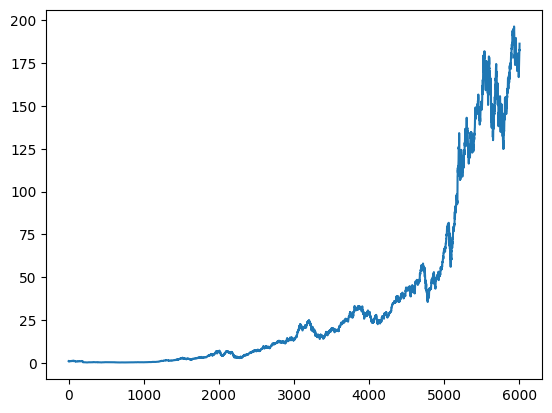

In [49]:
plt.plot(df.Close)

In [50]:
df

,Open,High,Low,Close,Volume
0,0.936384,1.004464,0.907924,0.999442,535796800
1,0.966518,0.987723,0.903460,0.915179,512377600
2,0.926339,0.987165,0.919643,0.928571,778321600
3,0.947545,0.955357,0.848214,0.848214,767972800
4,0.861607,0.901786,0.852679,0.888393,460734400
...,...,...,...,...,...
5999,176.380005,179.429993,176.210007,179.229996,63841300
6000,179.179993,182.440002,178.970001,181.820007,70530000
6001,182.350006,183.449997,181.589996,182.889999,49340300
6002,182.960007,184.119995,181.809998,182.410004,53763500


In [51]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
5999    181.630601
6000    181.588701
6001    181.568401
6002    181.542401
6003    181.566801
Name: Close, Length: 6004, dtype: float64

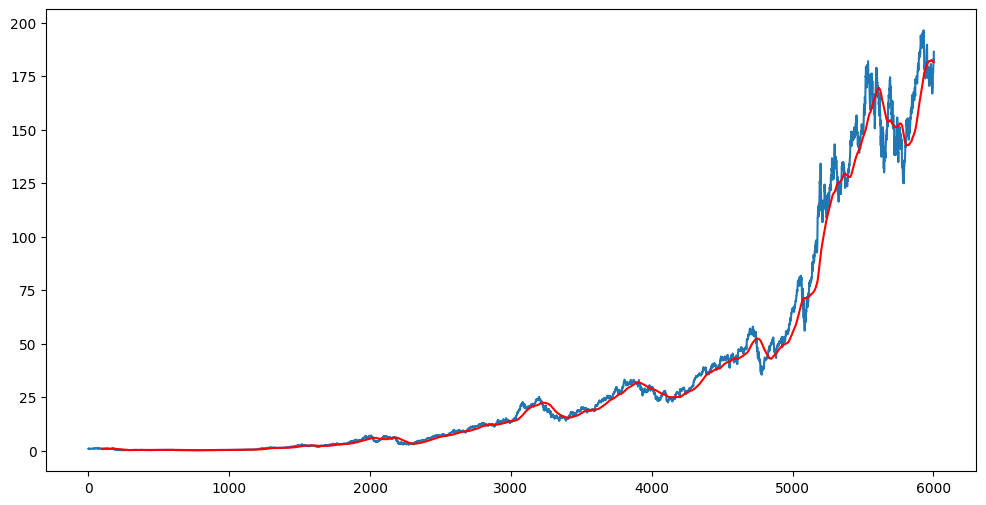

In [52]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [53]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5999    171.71065
6000    171.91420
6001    172.11600
6002    172.31875
6003    172.53095
Name: Close, Length: 6004, dtype: float64

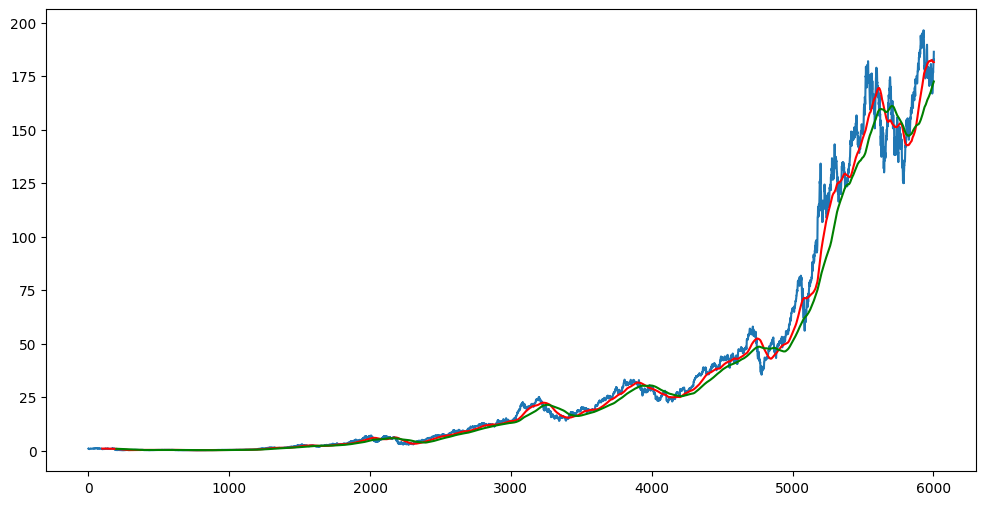

In [54]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [55]:
df.shape

(6004, 5)

In [56]:
# Splitting Data inot Training and  Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(4202, 1)
(1802, 1)


In [57]:
data_training.head()


,Close
0,0.999442
1,0.915179
2,0.928571
3,0.848214
4,0.888393


In [58]:
data_testing.head()

,Close
4202,28.892500
4203,28.730000
4204,28.395000
4205,28.392500
4206,28.387501


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [60]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02317551],
       [0.0206233 ],
       [0.02102893],
       ...,
       [0.79131151],
       [0.81031757],
       [0.83924319]])

In [61]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [62]:
x_train.shape

(4102, 100, 1)

In [63]:
#ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [64]:

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [66]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
129/129 [==============================] - 37s 245ms/step - loss: 0.0180
Epoch 2/50
129/129 [==============================] - 31s 238ms/step - loss: 0.0057
Epoch 3/50
129/129 [==============================] - 28s 218ms/step - loss: 0.0050
Epoch 4/50
129/129 [==============================] - 29s 222ms/step - loss: 0.0042
Epoch 5/50
129/129 [==============================] - 32s 249ms/step - loss: 0.0045
Epoch 6/50
129/129 [==============================] - 32s 246ms/step - loss: 0.0037
Epoch 7/50
129/129 [==============================] - 36s 280ms/step - loss: 0.0034
Epoch 8/50
129/129 [==============================] - 36s 279ms/step - loss: 0.0034
Epoch 9/50
129/129 [==============================] - 37s 286ms/step - loss: 0.0031
Epoch 10/50
129/129 [==============================] - 33s 254ms/step - loss: 0.0033
Epoch 11/50
129/129 [==============================] - 35s 269ms/step - loss: 0.0030
Epoch 12/50
129/129 [==============================] - 28s 217ms/step - lo

In [85]:
model.save('ker_model.h5')


In [68]:
data_testing.head()

,Close
4202,28.892500
4203,28.730000
4204,28.395000
4205,28.392500
4206,28.387501


In [69]:
past_100_days = data_training.tail(100)

In [70]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [71]:
final_df.head()

,Close
0,26.270000
1,26.087500
2,24.455000
3,23.707500
4,23.434999


In [72]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02119461],
       [0.02014494],
       [0.01075548],
       ...,
       [0.92200847],
       [0.91924773],
       [0.94219651]])

In [73]:
input_data.shape

(1902, 1)

In [74]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [75]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1802, 100, 1)
(1802,)


In [76]:
# Making Predictions

y_predicted = model.predict(x_test)

57/57 [==============================] - 6s 92ms/step


In [77]:
y_predicted.shape

(1802, 1)

In [78]:
y_test

array([0.03627815, 0.03534352, 0.03341674, ..., 0.92200847, 0.91924773,
       0.94219651])

In [79]:
y_predicted

array([[0.05740926],
       [0.05762446],
       [0.05795768],
       ...,
       [0.8433018 ],
       [0.8508325 ],
       [0.85866755]], dtype=float32)

In [80]:
scaler.scale_

array([0.00575159])

In [81]:
scale_factor = 1/0.02099517

ypredicted = y_predicted*scale_factor

y_test  = y_test * scale_factor

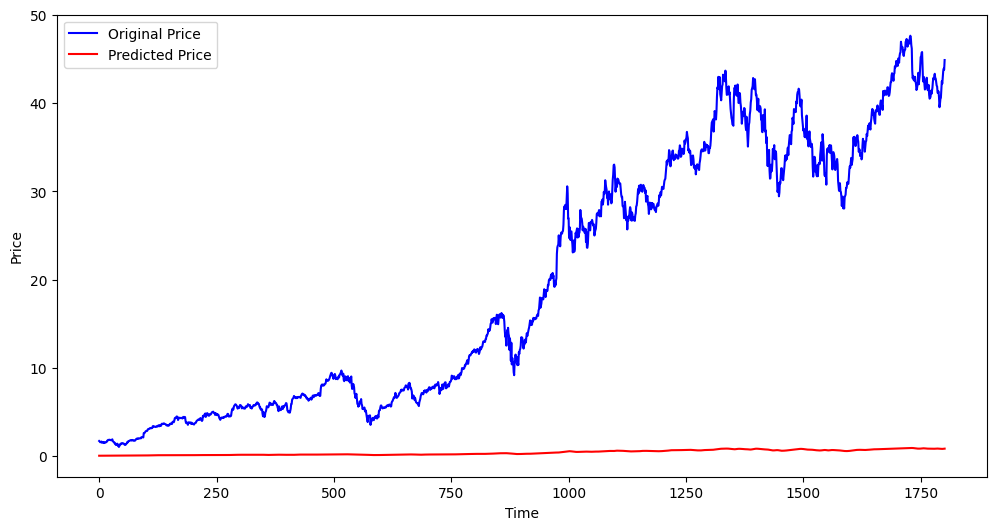

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')  # Fix the typo here
plt.legend()
plt.show()
